<a href="https://colab.research.google.com/github/smiledinisa/sk_learn/blob/master/sk_learn001_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
# from sklearn import tree #导入需要的模块
# clf = tree.DecisionTreeClassifier()   #实例化
# clf = clf.fit(X_train,y_train) #用训练集数据训练模型
# result = clf.score(X_test,y_test)  #导入测试集，从接口中调用需要的信息

In [ ]:
cd /content/drive/My Drive

/content/drive/My Drive


In [ ]:
from sklearn import tree
import sklearn


# class sklearn.tree.DecisionTreeClassifier (criterion=’gini’, splitter=’best’, max_depth=None,
# min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,
# random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None,
# class_weight=None, presort=False)

In [ ]:
# 以下就对以上的各个参数进行分析和解读。

# criterion: 标准。 不纯度： 有两个，信息熵，entropy，和基尼系数 Gini imputrity .

# 该参数就是确定不纯度的计算，找出最佳节点和最佳分支，不纯度越低，决策树对训练集的拟合越好。
# 该参数不填写默认使用gini，填写的话就两个选项。gini和 entropy。

![链接文字](https://img-blog.csdnimg.cn/20200818210331733.png?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L2dhb2N1aTg4Mw==,size_16,color_FFFFFF,t_70#pic_center)


p(i|t) 代表了t节点，i代表各个分类，p代表所占比例。分类i在节点t上所占的比例。

信息熵对不纯度更加敏感，惩罚最强。

但是实际使用中，信息熵和基尼系数其实是相当的。

信息熵的决策树生长的会更加精细，适合应用于高维数据和噪音较多的数据。

entropy很容易过拟合。



# 怎么选取：entropy 还是gini？？？
# 维度很大信息熵，噪音很大信息熵。
# 低纬度两者无区别。
# 拟合度度不够的时候选信息熵。
# 最终结论：两个都试试，哪个好，用哪个。----------------------废话。

决策树流程就是： 计算全部特征的不纯度指标-----》选取不纯度指标最优的特征来进行分支-----》在第一个特征的分支下，计算全部特征的不纯度指标-----------》选取最优----------》循环直到没有更多的特征，决策树停止生长。

In [ ]:
##1. 建立一棵树。

from sklearn import tree
from sklearn.datasets import load_wine #红酒数据集。
from sklearn.model_selection import train_test_split #进行数据集的分割，成为训练集和测试集。


In [ ]:
# 2.探索数据。（分析数据）
wine = load_wine()
wine.data.shape

(178, 13)

In [ ]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
import pandas as pd

In [ ]:
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)], axis=1)

wine.feature_names #酒的特征。

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine.target_names # 分类标签。

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [ ]:
# 3. 分训练集HE TEST

Xtrain, Xtest, Ytrain,Ytest = train_test_split(wine.data,wine.target, test_size =0.3)

Xtrain.shape

(124, 13)

In [ ]:
Xtest.shape # X是数据，Y是标签，特征数为13


(54, 13)

In [ ]:
# 建立模型。
clf =tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(Xtrain,Ytrain) # 填入训练集。
score = clf.score(Xtest,Ytest) # 用测试集进行测试。

score #得出测试准确度。

0.9629629629629629

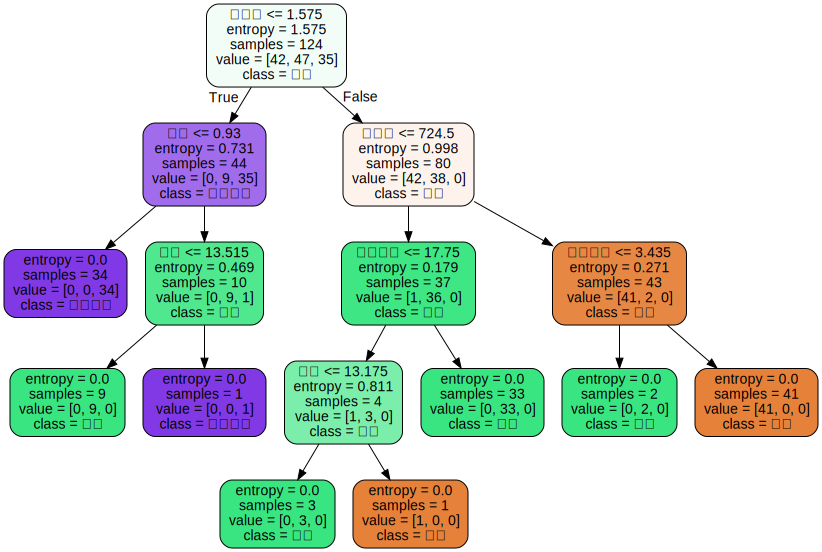

In [ ]:
# 5 画出一棵树。

feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']

import graphviz
dot_data = tree.export_graphviz(clf, out_file=None
                                ,feature_names = feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True
                                ,rounded=True
                               ) 
graph = graphviz.Source(dot_data)
graph

In [ ]:
# 我们已经根据一个参数也就是标准 criterion ：来建立了一棵决策树。
# 但是一般来说决策树对不同的数据不能保证最优，那么sk-learn的方法就是造不同的决策树。

# 第二个参数。 random_state.

# 然后sklearn根据不同的决策树来选择最优的树。

# clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30)
# clf = clf.fit(Xtrain,Ytrian)
# score = clf.score(Xtest,Ytest)

## random_state & spliter

 random_state 让树构建的时候更加随机，当然这中随机是建立在数据集维度够高的前提下。

spliter 有两个参数 best和random ，best，虽然随机，但是还是会考虑更加重要的feature。重要性可以同构feature_importances_来查看。

random ：则就不会考虑feature_importances_




In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy', random_state=30, splitter='random')

clf = clf.fit(Xtrain,Ytrain)

score = clf.score(Xtest,Ytest)

score

0.9444444444444444

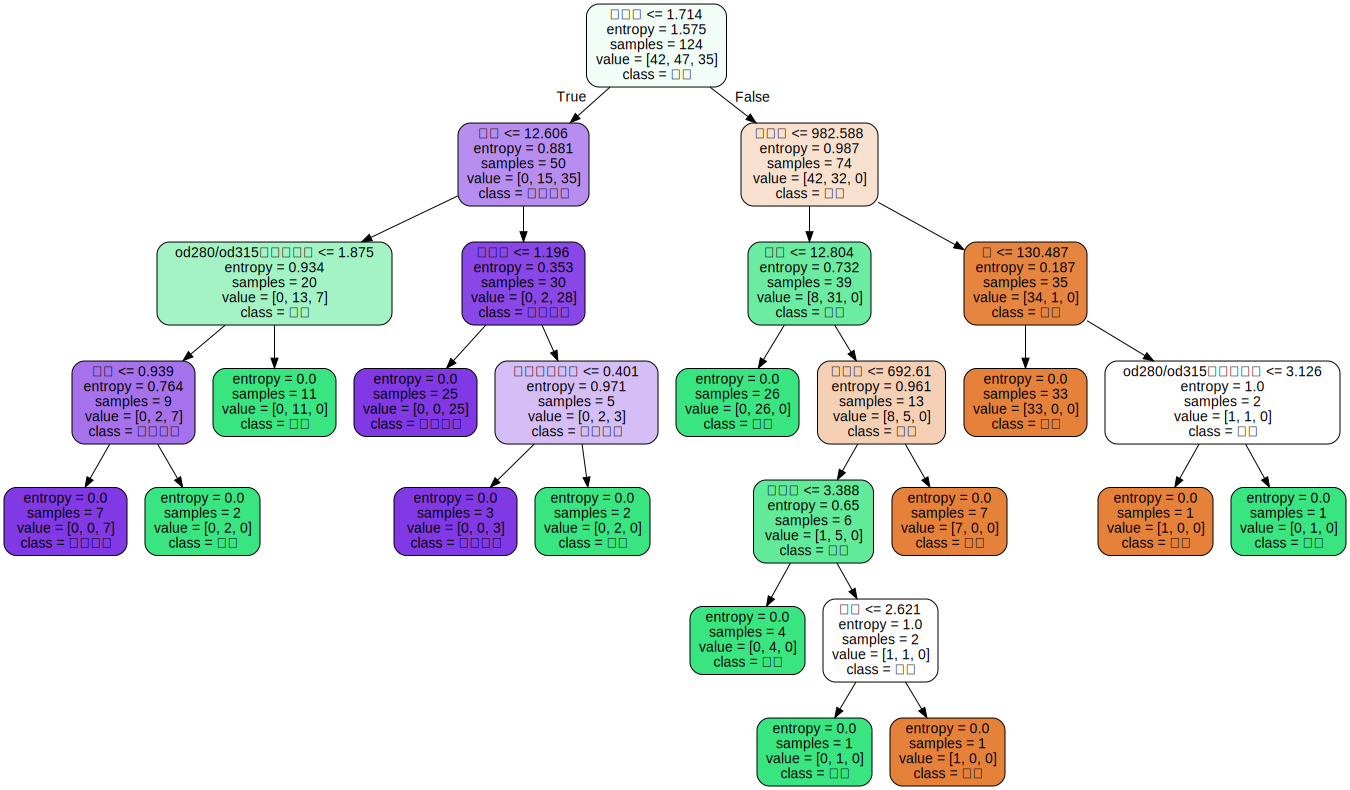

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf,feature_names=feature_name,class_names=['琴酒','雪梨','贝尔莫德'],filled=True,rounded=True)

graph = graphviz.Source(dot_data)
graph